<a href="https://colab.research.google.com/github/danieldrako/Estadistica-Descriptiva-Matemaicas-Data-Science/blob/main/02Medidas_de_dispersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medidas de dispersión

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

###Medidas de dispersión

Las medidas de dispersión, también llamadas medidas de variabilidad, muestran la variabilidad de una distribución, indicando por medio de un número, si las diferentes puntuaciones de una variable están muy alejadas de la media. Cuanto mayor sea ese valor, mayor será la variabilidad, cuanto menor sea, más homogénea será. Así se sabe si todos los casos son parecidos o varían mucho entre ellos.

- Rango: El rango o recorrido estadístico es la diferencia entre el valor mínimo y el valor máximo en un grupo de números aleatorios. Se le suele simbolizar con R.
Requisitos del rango:
  * Se ordenan los números según su tamaño.
  * Se resta el valor mínimo del valor máximo.

- Cuartiles: Los cuartiles son valores que dividen una muestra de datos en cuatro partes iguales.

  * 1er cuartil (Q1): 25% de los datos es menor que o igual a este 

  * 2do cuartil (Q2): La mediana. 50% de los datos es menor que o igual a este valor.

  * 3er cuartil (Q3): 75% de los datos es menor que o igual a este valor.

- Rango intercuartil: La distancia entre el primer 1er cuartil y el 3er cuartil (Q3-Q1); de esta manera, abarca el 50% central de los datos.

- Diagrama de caja o box plot: representa gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, el diagrama de caja muestra a simple vista la mediana y los cuartiles de los datos. También puede representar los valores atípicos de estos.

## Desviación estándar
La desviación estándar es la medida de dispersión más común, que indica qué tan dispersos están los datos con respecto a la media. Mientras mayor sea la desviación estándar, mayor será la dispersión de los datos.
El símbolo σ (sigma) se utiliza frecuentemente para representar la desviación estándar de una población, mientras que s se utiliza para representar la desviación estándar de una muestra.
La desviación estándar se puede utilizar para establecer un valor de referencia para estimar la variación general de un proceso.



## Varianza
 Es una medida de dispersión que representa la variabilidad de una serie de datos respecto a su media. Formalmente se calcula como la suma de los residuos al cuadrado divididos entre el total de observaciones. Su fórmula es la siguiente:
  * X → Variable sobre la que se pretenden calcular la varianza
  * xi → Observación número i de la variable X. i puede tomará valores entre 1 y n.
  * N → Número de observaciones.
  * x̄ → Es la media de la variable X.

La diferencia entre la desviación estándar o típica y la varianza, es que la la desviación típica es la raíz cuadrada de la varianza

##Coeficiente de variación

Y no nos podemos olvidar de otra medida de dispersión muy importante, que es el **coeficiente de variación**:

Su cálculo se obtiene de dividir la desviación típica entre el valor absoluto de la media del conjunto y por lo general se expresa en porcentaje para su mejor comprensión.

  * X → Variable sobre la que se pretenden calcular la varianza
  * σx → Desviación típica de la variable X.
  * | x̄ | → Es la media de la variable X en valor absoluto con x̄ ≠ 0

El coeficiente de variación de utiliza para comparar la dispersión (variación) de conjuntos de datos de medidas diferentes o con medias aritméticas diferentes.

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Estadistica-Descriptiva-Matemaicas-Data-Science/car.csv')

Desviacion estandar 

In [ ]:
df['price_usd'].std()

6428.1520182029035

Rango = valor max - valor min



In [ ]:
rango = df['price_usd'].max() - df['price_usd'].min()
rango

49999.0


Quartiles


In [ ]:
median = df['price_usd'].median() #es uno de los cuartiles 
Q1 = df['price_usd'].quantile(q=0.25)
Q3 = df['price_usd'].quantile(q=0.75)
min_val = df['price_usd'].quantile(q=0)
max_val = df['price_usd'].quantile(q=1.0)
print(min_val, Q1, median, Q3, max_val)

1.0 2100.0 4800.0 8990.0 50000.0


Rango intercuartilico 

In [ ]:
iqr = Q3 - Q1
iqr

6890.0

### Límites para detección de outliers (datos simetricamente distribuidos)

Datos entre  $Q_1 -1.5 \times \text{IQR}$ y $Q_3 + 1.5 \times \text{IQR}$

In [ ]:
minlimit = Q1 - 1.5*iqr
maxlimit = Q3 + 1.5*iqr
print('rango para detección de outliers: {}, {}'.format(minlimit, maxlimit))

rango para detección de outliers: -8235.0, 19325.0


Diagrama de caja

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, '')]

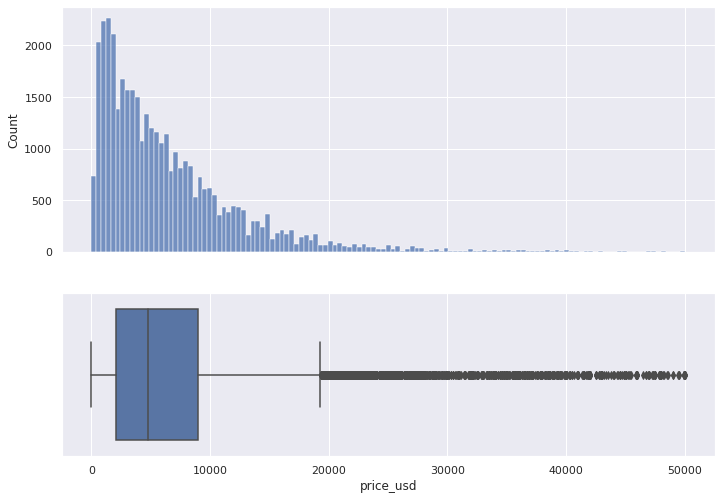

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(df['price_usd'], ax=ax_hist)
sns.boxplot(df['price_usd'], ax=ax_box)
ax_hist.set(xlabel='')

Es posible calcular varios box-plot separando por una cierta variable categórica:

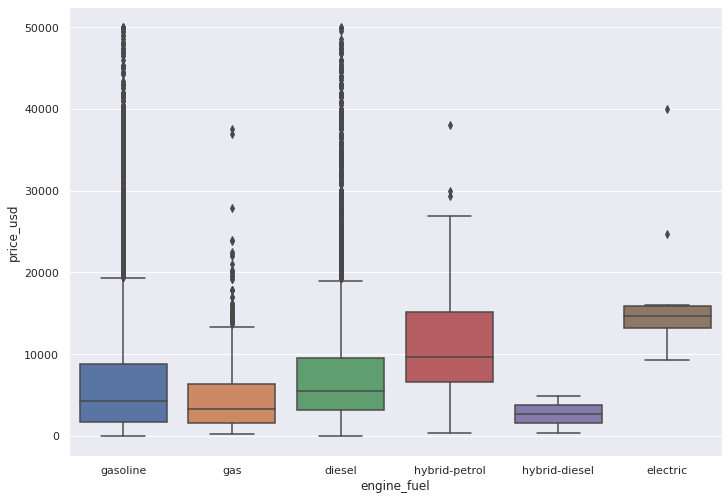

In [ ]:
sns.boxplot(x = 'engine_fuel', y = 'price_usd', data = df)